# The $\chi^2$ Distribution

The $\chi^2$ distribution is the distribution of the values of $X^2$, when $X$ represents a sample from a normal/Gaussian distribution.  

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

# Generate some data ... 10 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 30.
npts = 10
mu = 100.0
sigma = 30.0
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

plt.hist(x,bins=50)

# calculate the sample mean, and the sample standard deviation (unbiased).
xbar = np.mean(x)
s = np.std(x,ddof=1)

print ("Mean = ",xbar," Std. Dev. = ",s)

Mean =  96.44644333857285  Std. Dev. =  24.762795016413964


The question that we wish to answer is:  is the value of $s$ that we measure (the SAMPLE standard deviation) consistent with the population standard deviation that we expect, $\sigma$?

We can answer this question using the $\chi^2$ distribution.

The test statistic is the variable, $\chi^2$, which is defined as the ratio of the sample variance to the expected population variance, multiplied by the number of degrees of freedom.

In [2]:
df = npts - 1
chi2_data = df*s**2/sigma**2

print ("Chi^2 statistic = ",chi2_data)

Chi^2 statistic =  6.131960170249363


# plot the $\chi^2$ distribution

3.325112843066815 16.918977604620448


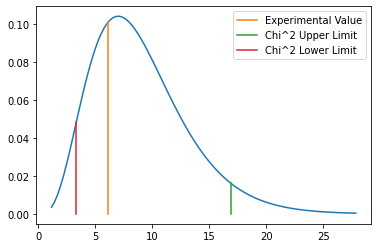

In [3]:
df = npts - 1
x = np.linspace(stats.chi2.ppf(0.001, df),stats.chi2.ppf(0.999, df), 100)
chi2_dist = stats.chi2.pdf(x,df)

chi2_stat_line_x = np.array([chi2_data,chi2_data])
chi2_stat_line_y = np.array([0,stats.chi2.pdf(chi2_data,df)])

alpha = 0.10

chi2_upper = stats.chi2.ppf(1-alpha/2,df)
chi2_lower = stats.chi2.ppf(alpha/2,df)

print(chi2_lower, chi2_upper)

chi2_upper_line_x = np.array([chi2_upper,chi2_upper])
chi2_upper_line_y = np.array([0,stats.chi2.pdf(chi2_upper,df)])

chi2_lower_line_x = np.array([chi2_lower,chi2_lower])
chi2_lower_line_y = np.array([0,stats.chi2.pdf(chi2_lower,df)])

plt.plot(x,chi2_dist)
plt.plot(chi2_stat_line_x,chi2_stat_line_y,label="Experimental Value")
plt.plot(chi2_upper_line_x,chi2_upper_line_y,label="Chi^2 Upper Limit")
plt.plot(chi2_lower_line_x,chi2_lower_line_y,label="Chi^2 Lower Limit")
plt.legend()